In [1]:
import numpy as np 
import pandas as pd
train=pd.read_csv('/kaggle/input/imdb-50k-movie-reviews-test-your-bert/train.csv',sep='\t')
test=pd.read_csv('/kaggle/input/imdb-50k-movie-reviews-test-your-bert/test.csv',sep='\t')

In [2]:
train.head()

,"text,sentiment"
0,"Now, I won't deny that when I purchased this o..."
1,"The saddest thing about this ""tribute"" is that..."
2,Last night I decided to watch the prequel or s...
3,I have to admit that i liked the first half of...
4,I was not impressed about this film especially...


In [3]:
train[['text', 'sentiment']] = train['text,sentiment'].str.rsplit(',', n=1, expand=True)

In [4]:
test[['text', 'sentiment']] = test['text,sentiment'].str.rsplit(',', n=1, expand=True)

In [5]:
train = train.drop(columns=['text,sentiment'])

In [6]:
train.head()

,text,sentiment
0,"Now, I won't deny that when I purchased this o...",neg
1,"The saddest thing about this ""tribute"" is that...",neg
2,Last night I decided to watch the prequel or s...,neg
3,I have to admit that i liked the first half of...,neg
4,I was not impressed about this film especially...,neg


In [7]:
print(train.columns)

Index(['text', 'sentiment'], dtype='object')


In [8]:
train.sentiment.value_counts()

sentiment
neg    12500
pos    12500
Name: count, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer    

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
def clean_text(text):
    
    if not isinstance(text, str):
        return ""

    text = text.lower()

    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r"[^a-zA-Z\s']", '', text)

    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

train['cleaned_text'] = train['text'].apply(clean_text)
test['cleaned_text'] = test['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [10]:
train.head()

,text,sentiment,cleaned_text
0,"Now, I won't deny that when I purchased this o...",neg,now i won't deny that when i purchased this of...
1,"The saddest thing about this ""tribute"" is that...",neg,the saddest thing about this tribute is that a...
2,Last night I decided to watch the prequel or s...,neg,last night i decided to watch the prequel or s...
3,I have to admit that i liked the first half of...,neg,i have to admit that i liked the first half of...
4,I was not impressed about this film especially...,neg,i was not impressed about this film especially...


In [11]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def normalize_text(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

train['normalized_text'] = train['cleaned_text'].apply(normalize_text)
test['normalized_text'] = test['cleaned_text'].apply(normalize_text)

In [12]:
train.head(10)

,text,sentiment,cleaned_text,normalized_text
0,"Now, I won't deny that when I purchased this o...",neg,now i won't deny that when i purchased this of...,deny purchased ebay high expectation incredibl...
1,"The saddest thing about this ""tribute"" is that...",neg,the saddest thing about this tribute is that a...,saddest thing tribute almost singer including ...
2,Last night I decided to watch the prequel or s...,neg,last night i decided to watch the prequel or s...,last night decided watch prequel shall say cal...
3,I have to admit that i liked the first half of...,neg,i have to admit that i liked the first half of...,admit liked first half sleeper looked good act...
4,I was not impressed about this film especially...,neg,i was not impressed about this film especially...,impressed film especially fact went cinema fam...
5,"The original movie, The Odd Couple, has some w...",pos,the original movie the odd couple has some won...,original movie odd couple wonderful comic onel...
6,"This was a great movie with a good cast, all o...",pos,this was a great movie with a good cast all of...,great movie good cast hitting cylinder dianne ...
7,"I'm a sucker for a good romance, but this one ...",neg,i'm a sucker for a good romance but this one d...,sucker good romance one qualify either good ro...
8,"Fast-paced, funny, sexy, and spectacular. Cagn...",pos,fastpaced funny sexy and spectacular cagney is...,fastpaced funny sexy spectacular cagney always...
9,"The proverb ""Never judge a book by it's cover""...",neg,the proverb never judge a book by it's cover w...,proverb never judge book cover coined warning ...


In [13]:
# Encode sentiment labels (assuming 'pos'/'neg')
le = LabelEncoder()
train['sentiment_encoded'] = le.fit_transform(train['sentiment'])
test['sentiment_encoded'] = le.fit_transform(test['sentiment'])

In [14]:
train_200 = train.sample(n=200, random_state=42)  # 200 total
test_100 = test.sample(n=100, random_state=42)    # 100 total

In [ ]:
!pip install git+https://github.com/pmbaumgartner/setfit -q

In [15]:
from setfit import SetFitClassifier
clf = SetFitClassifier("paraphrase-MiniLM-L3-v2")


In [21]:
clf.fit(
    train_200['normalized_text'].tolist(),
    train_200['sentiment_encoded'].tolist()
)

# Evaluate
test_100['predicted']  = clf.predict(test_100['normalized_text'].tolist())
accuracy = np.mean(predictions == test_100['sentiment_encoded'].values)
print(f"Few-shot Accuracy: {accuracy:.4f}")

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/125 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Few-shot Accuracy: 0.7200


In [23]:
train_predictions = clf.predict(train_200['normalized_text'].tolist())
train_accuracy = np.mean(train_predictions == train_200['sentiment_encoded'].values)
print(f"Training Accuracy: {train_accuracy:.4f}")

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Training Accuracy: 0.9800


<Axes: >

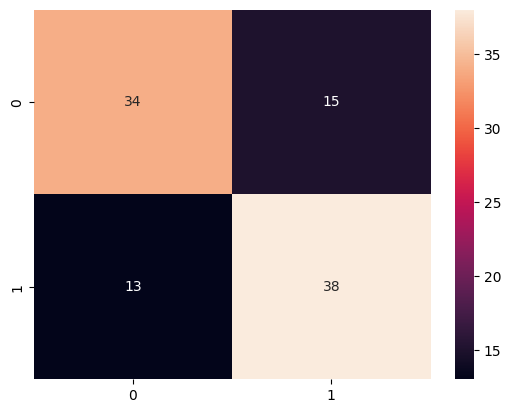

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_100['sentiment_encoded'], predictions)
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
!pip install numpy==1.23.5 \
            jax==0.4.13 \
            jaxlib==0.4.13 \
            transformers==4.34.1 \
            sentence-transformers==2.2.2 \
            setfit==1.0.3 \
            torch==2.0.1